In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context('poster')

dataset = 'val'

docs_df = pd.read_csv(f'data/documents_en_{dataset}.csv')
df = pd.read_csv(f'data/sentences_en_{dataset}.csv')
df.head(10)

,doc_id,sentence_id,sentence_text,is_relevant,sector_ids
0,46540,0,"See discussions, stats, and author profiles fo...",0,[]
1,46540,1,View project Municipal Services Project View p...,0,[]
2,46540,2,The user has requested enhancement of the down...,0,[]
3,46540,3,PUBLIC WATER AND COVID 19 - DARK CLOUDS AND SI...,0,[]
4,46540,4,"You may copy and distribute the document, in i...",0,[]
5,46540,5,Acknowledgments: We would like to acknowledge ...,0,[]
6,46540,6,We would also like to thank Madeleine B langer...,0,[]
7,46540,7,Partial funding of this project came from the ...,0,[]
8,46540,8,The Municipal Services Project (MSP) is a glob...,0,[]
9,46540,9,Learn more at www.municipalservicesproject.org.,0,[]


### Statistical

# of documents, sentences:
343, 37109


Number of sentences per document:
108.18950437317784 ± 488.49370035183443


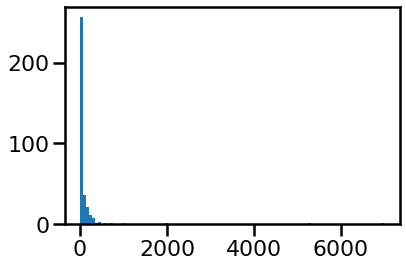

In [10]:
print('# of documents, sentences:')
print(f'{len(df.doc_id.unique())}, {df.sentence_id.count()}')
print('\n')

print('Number of sentences per document:')
counts = df.groupby(['doc_id']).count().sentence_id
print(f'{np.mean(counts)} ± {np.std(counts)}')

plt.hist(counts, bins=100);

# of sentences < 500 docs:
0.9825072886297376


Distribution of # of sentences per doc with a hard-cap


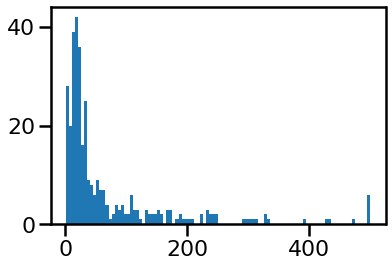

In [11]:
# put a hard cap
cap = 500

print(f'# of sentences < {cap} docs:')
counts = df.groupby(['doc_id']).count().sentence_id
print(np.mean(counts <= cap))
print('\n')

print(f'Distribution of # of sentences per doc with a hard-cap')
counts = np.minimum(counts, cap)
plt.figure()
plt.hist(counts, bins=100);

# of *relevant* sentences per document:
16.154098360655738 ± 21.4492735462639




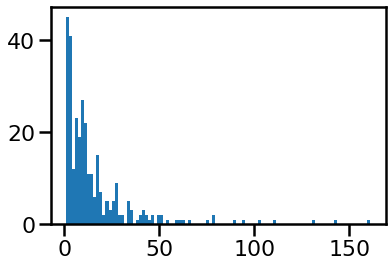

In [12]:
rel_df = df.loc[df['is_relevant'] == 1] 

print('# of *relevant* sentences per document:')
counts = rel_df.groupby(['doc_id']).count().sentence_id
print(f'{np.mean(counts)} ± {np.std(counts)}')
print('\n')
plt.hist(counts, bins=100);

# of *relevant* sentences per document (< 500 sentences):
16.154098360655738 ± 21.4492735462639




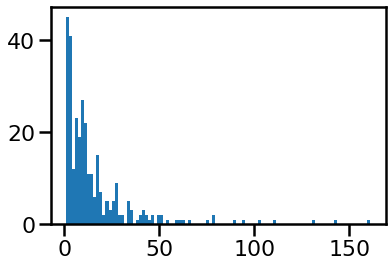

In [13]:
cap = 500
print(f'# of *relevant* sentences per document (< {cap} sentences):')

counts = np.minimum(counts, cap)
print(f'{np.mean(counts)} ± {np.std(counts)}')
print('\n')
plt.hist(counts, bins=100);

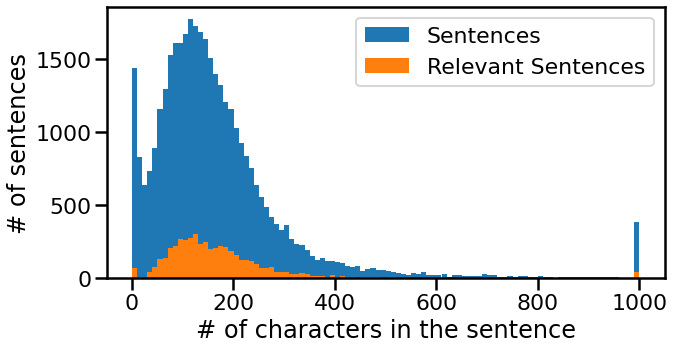

In [14]:
rel_df = df.loc[df['is_relevant'] == 1]
df_sentences = df.sentence_text.str.len()
rel_sentences = rel_df.sentence_text.str.len()

cap = 1000
df_sentences = np.minimum(cap, df_sentences)
rel_sentences = np.minimum(cap, rel_sentences)

plt.figure(figsize=(10,5));
plt.ylabel('# of sentences')
plt.xlabel('# of characters in the sentence')
plt.hist(df_sentences, bins=100, label='Sentences');
plt.hist(rel_sentences, bins=100, label='Relevant Sentences');
plt.legend();

### Textual

In [15]:
rel_df = df.loc[df['is_relevant'] == 1].groupby('doc_id')
rel_sentences = rel_df.sentence_text.apply(list)

doc_id = np.random.choice(rel_sentences.keys())

print(f'Document #{doc_id} (Relevant Sentences):')
print('\n')
print('\n\n'.join(rel_sentences[doc_id]))
print('\n')

doc = docs_df.loc[docs_df['doc_id'] == doc_id].iloc[0]
print(f'Full document:')
print(f'Country code: {doc.country_code}')
print(f'Doc URL: {doc.doc_url}')
print('\n')
print('\n')
print(doc.doc_text)

doc_id
34590    [Whole of Syria Situation update: Northeast Sy...
34644    [This is a massive decline from over 9,600 dis...
34696    [International aid agency, World Vision, today...
34794    [Fishkhabour open only Sunday and Wednesday, o...
34871    [Following the escalation of conflict in north...
                               ...                        
51670    [More than 2.7 million people have died due to...
51824    [A massive fire broke out at Rohingya refugee ...
51827    [Cox s Bazar, Bangladesh, March 23, 2021 The I...
51829    [More than 1,000 Red Crescent staff and volunt...
51848    [423 HFs functional compared to 396 in 3rd qua...
Name: sentence_text, Length: 305, dtype: object
Document #48235 (Relevant Sentences):


Worried by reports of non-compliance with the just signed Executive Order that makes wearing of face mask and observation of social distancing in the public mandatory, the presidency yesterday asked Nigerians to adhere to COVID-19 guidelines to avert anoth

In [27]:
def short_rel_sentences(l, txt, verbose=True):
    rel_df = df[df['is_relevant'] == 1]
    if verbose:
        print(f'# of relevant sentences: {rel_df.sentence_id.count()}')

    # problem parsing "."
    short_df = rel_df[rel_df['sentence_text'].str.len() <= l]
    if verbose:
        print(f'# of relevant sentences ({l} <=): {short_df.sentence_id.count()}')

    short_df = short_df[short_df['sentence_text'].str.contains(txt)]
    if verbose:
        print(f'# of relevant sentences ({l} <= and including "{txt}"): {short_df.sentence_id.count()}')

    return short_df

short_df = short_rel_sentences(2, '\.')

# of relevant sentences: 41895
# of relevant sentences (2 <=): 5138
# of relevant sentences (2 <= and including "\."): 5103


In [28]:
short_rel_sentences(10, '.', verbose=False).head(100)

,doc_id,sentence_id,sentence_text,is_relevant,sector_ids
590,51363,312,Education.,1,"[2, 3, 4]"
636,51363,358,Education.,1,"[2, 3, 4]"
815,51363,537,20,1,[1]
2062,49920,198,2020.,1,[3]
2065,49920,201,2020.,1,[3]
...,...,...,...,...,...
3674,47409,86,.,1,"[1, 9, 10]"
3675,47409,87,.,1,"[1, 9, 10]"
3676,47409,88,.,1,"[1, 9, 10]"
3677,47409,89,.,1,"[1, 9, 10]"


In [29]:
# print a random sentence with preceding and following sentences
short_df = short_rel_sentences(2, '.', verbose=False)
sentences = short_df.index.values
sentence = np.random.choice(sentences)
print(f'Doc ID: {df.iloc[sentence].doc_id}, Sentence ID: {df.iloc[sentence].sentence_id}')
print('\n')

assert(df.iloc[sentence-1].sentence_id + 1 == df.iloc[sentence].sentence_id)
assert(df.iloc[sentence-1].doc_id == df.iloc[sentence].doc_id)
print(df.iloc[sentence-1].sentence_text)

print(df.iloc[sentence].sentence_text)

assert(df.iloc[sentence+1].sentence_id - 1 == df.iloc[sentence].sentence_id)
assert(df.iloc[sentence+1].doc_id == df.iloc[sentence].doc_id)
print(df.iloc[sentence+1].sentence_text)

Doc ID: 35073, Sentence ID: 970


Self-reported by household and not medically confirmed.
2.
Percentages are from among respondents who reported issues accessing healthcare.


In [30]:
rel_df = df.loc[df['is_relevant'] == 1]
print(f'# of relevant sentences: {rel_df.sentence_text.count()}')
print('\n')

number_df = rel_df[rel_df.sentence_text.str.contains('\d')]
print(f'# of relevant sentences with a digit character: {number_df.sentence_text.count()}')
print('\n')

print(f'# of total sentences: {df.sentence_text.count()}')
print('\n')

number_df = df[df.sentence_text.str.contains('\d')]
print(f'# of total sentences with a digit character: {number_df.sentence_text.count()}')
print('\n')

# of relevant sentences: 41895


# of relevant sentences with a digit character: 24743


# of total sentences: 261981


# of total sentences with a digit character: 139914


